In [2]:
import seaborn as sns
from datetime import datetime
from math import ceil
from skimage.io import imsave
import openpyxl
import numpy as np
import matplotlib.pyplot as plt
#%plt.style.use("v_paper")
import pandas as pd
from scipy.io import loadmat
from scipy.io import savemat
%matplotlib inline
import seaborn as sns
import statsmodels.formula.api as smf
import re
from statsmodels.stats.anova import anova_lm
import os
import os.path
import statsmodels.api as smapi
import sys
import warnings
from sklearn.linear_model import LinearRegression
if not sys.warnoptions:
    warnings.simplefilter("ignore")
import seaborn as sns
import statsmodels as sm
import scipy
from pathlib import Path

In [1]:
from scipy.stats import binned_statistic

In [3]:
from scipy.ndimage.filters import uniform_filter1d

In [4]:
GoodICFiles=pd.read_pickle("Z:\GrunwaldKadow_group\Sophie\WalkProject\GoodICsdf.pkl")

216
7f


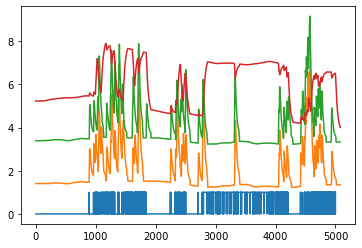

100761
7s


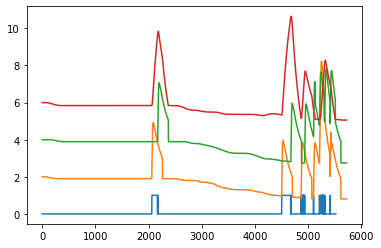

100762
7s


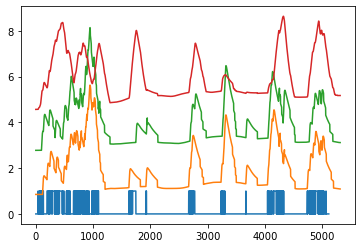

104
6m


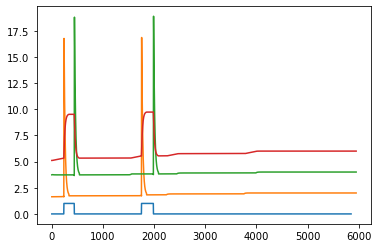

100106
6m


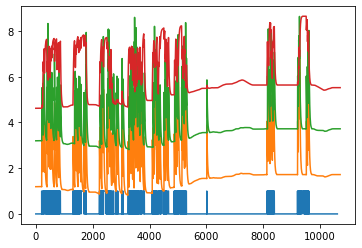

B34
6m


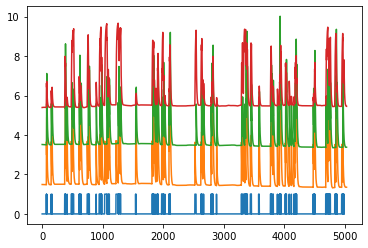

B35
6m


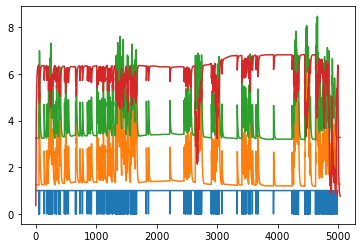

B36
6m


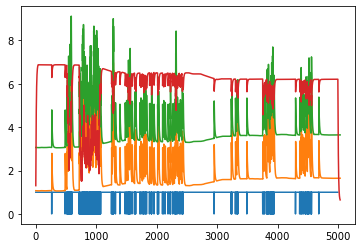

B37
6m


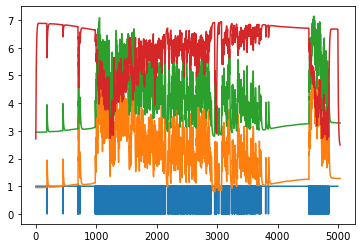

B38
6m


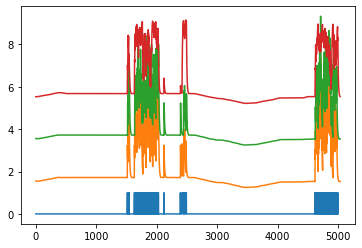

B39
6m


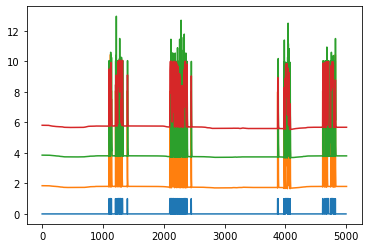

B40
6m


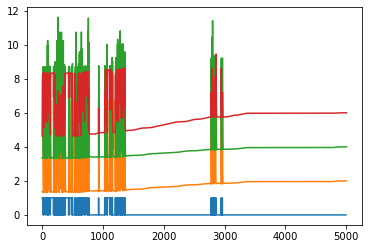

B41
6m


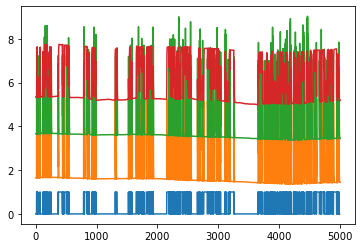

B42
6m


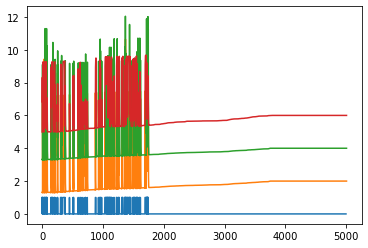

B43
6m


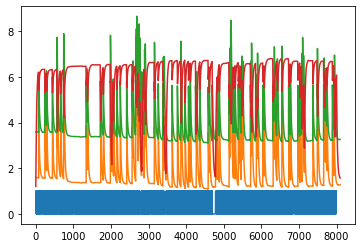

B182
6m


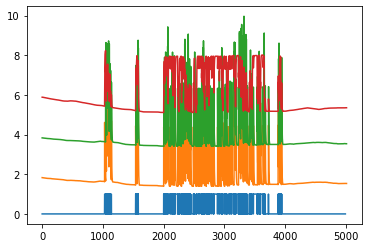

B183
6m


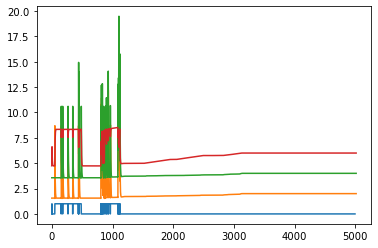

B192
6m


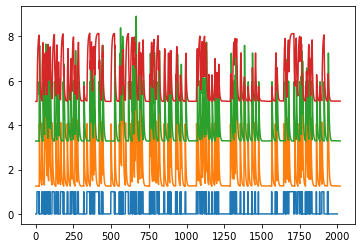

B193
6m


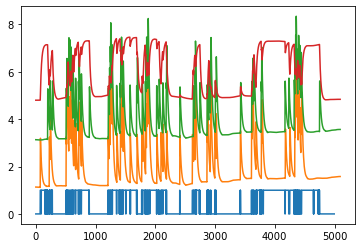

B194
6m


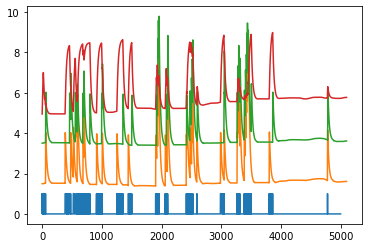

B195
6m


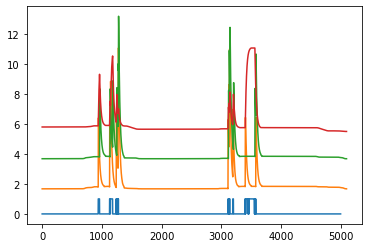

B196
6m


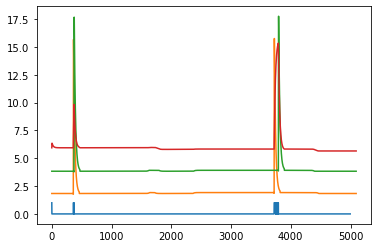

100148
6f


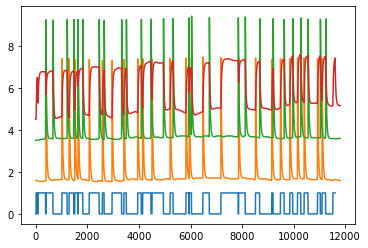

100234
6f


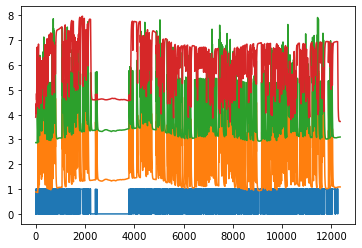

100609
6f


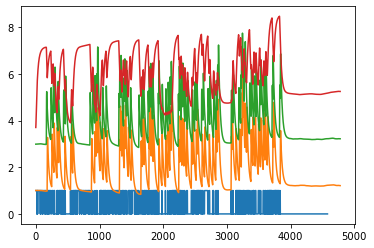

981
6s


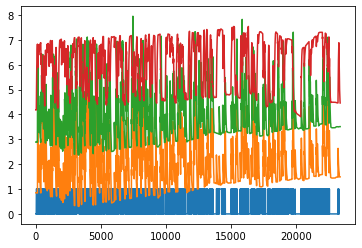

100133
6s


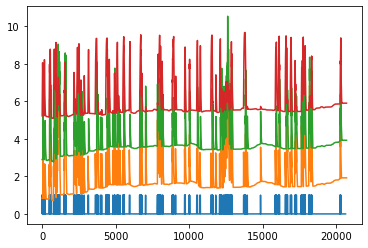

B993
7s


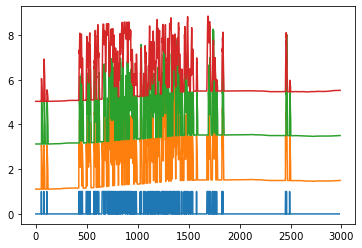

B996
7s
B1037
6s


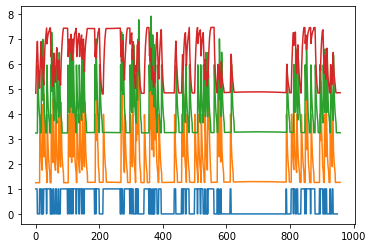

B1047
6s


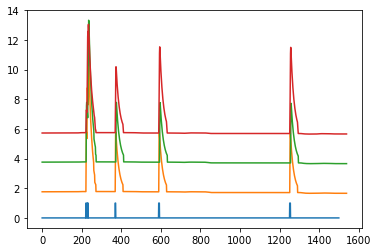

249
syt6s


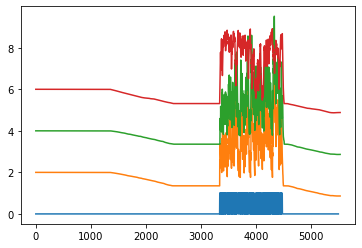

359
syt6s


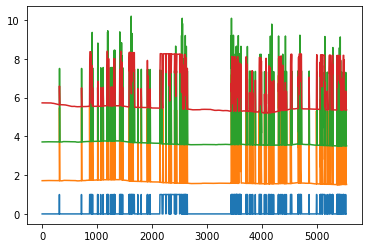

369
syt6s


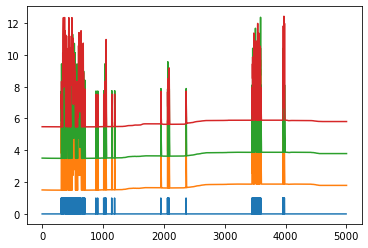

370
syt6s


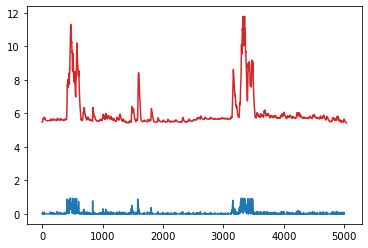

371
syt6s


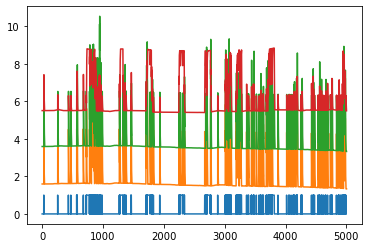

372
syt6s


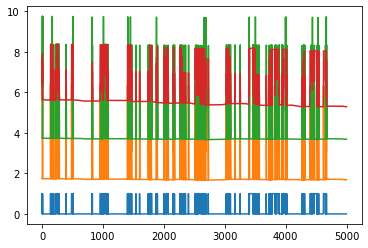

B1070
syt6s


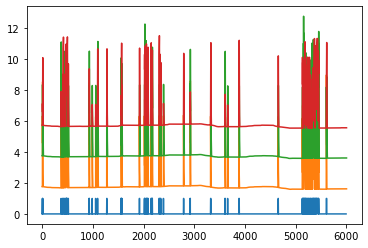

B1125
syt6s


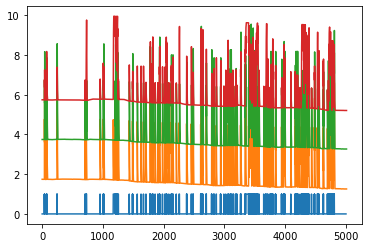

B1126
syt6s


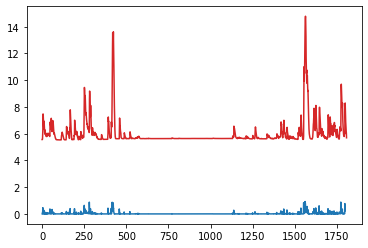

B1128
syt6s


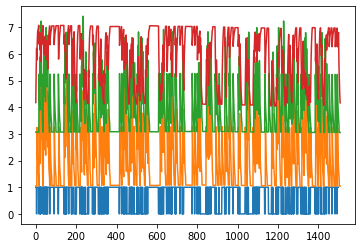

100160
6f


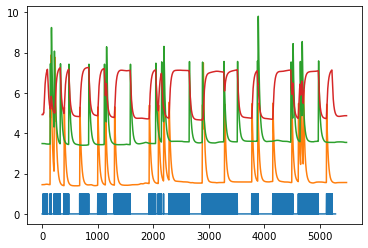

B1073
6m


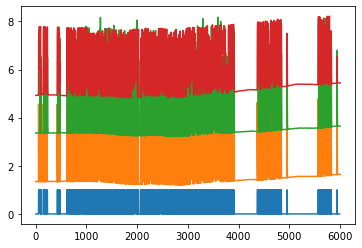

B1075
6m


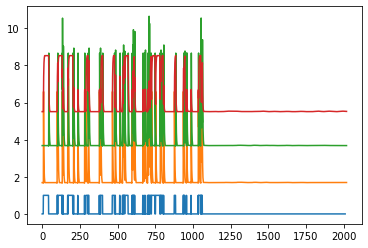

B1080
6m


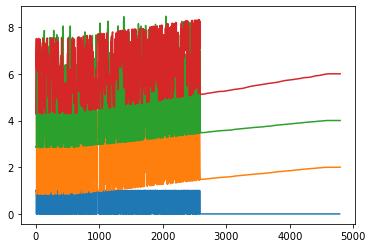

B1090
6m


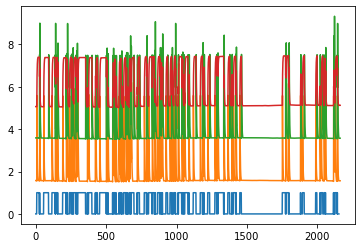

B66
6m


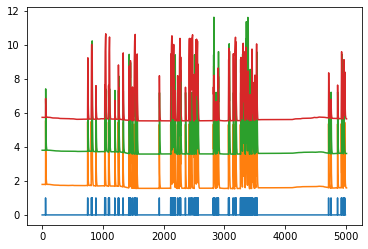

B70
6m


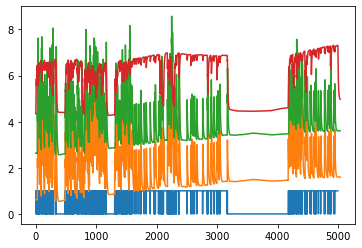

B74
6m


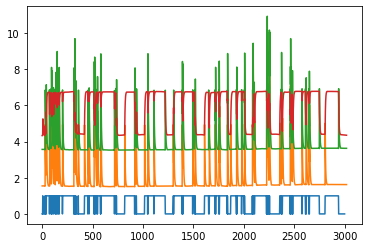

B75
6m


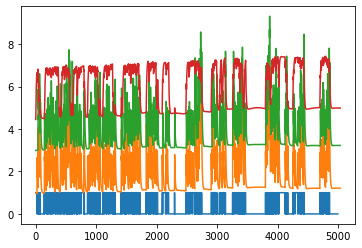

B99
6m


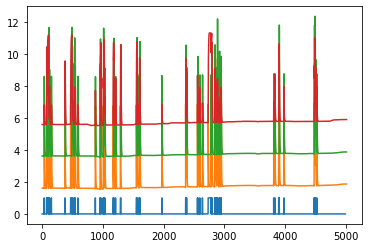

B100
6m


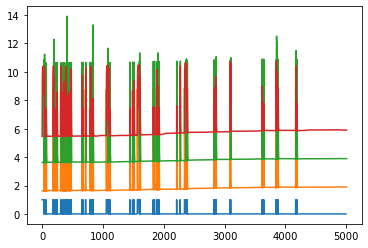

B175
6m


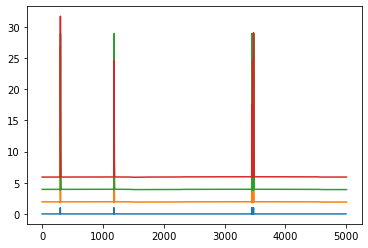

B176
6m


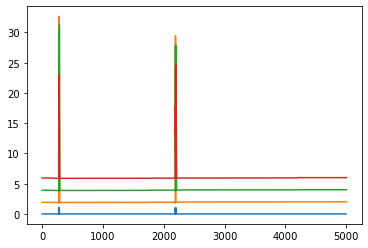

B116
6m


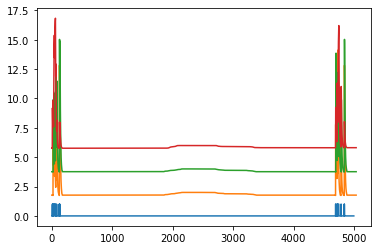

B117
6m


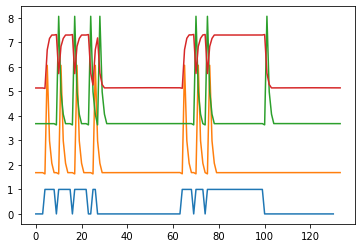

B118
6m


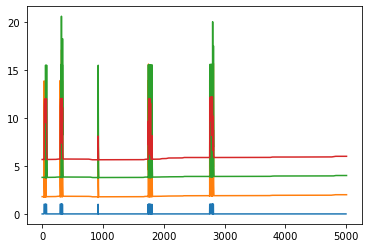

B126
6m


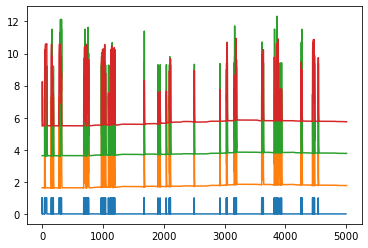

B153
6m


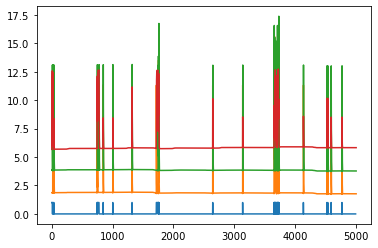

B130
6m


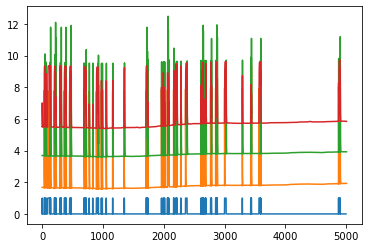

B132
6m


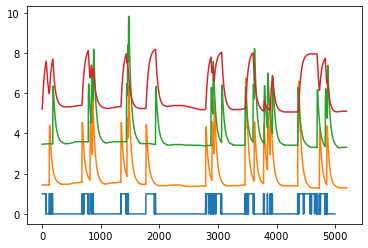

B134
6m


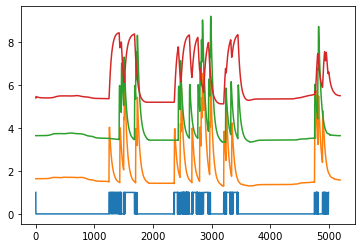

B140
6m


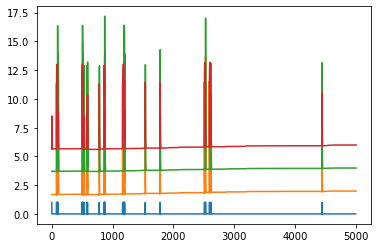

107
6m


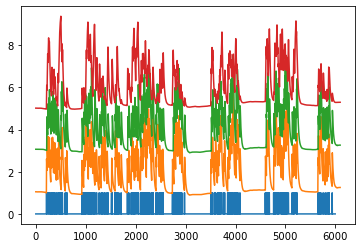

100142
6f


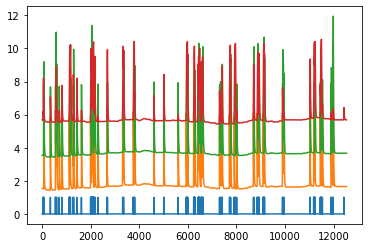

100405
6f
100411
6f
100455
6f


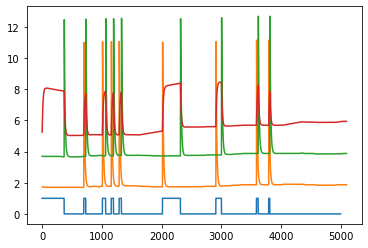

100597
6f


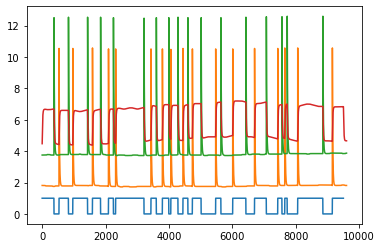

100621
6f


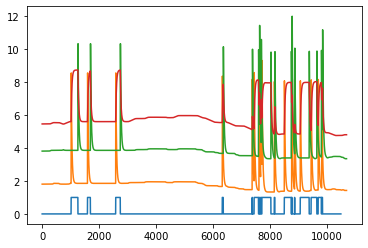

B370
6m


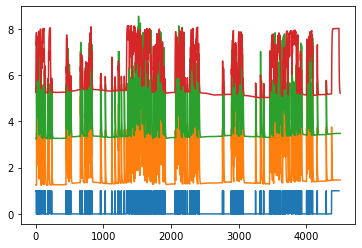

B373
6m


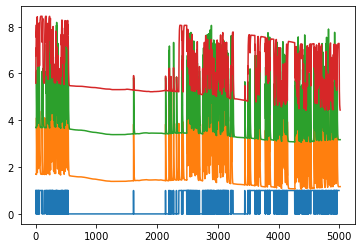

46
6m


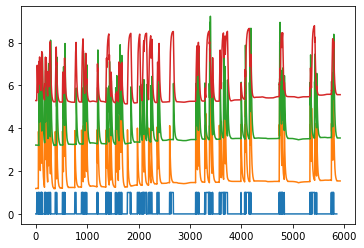

B1054
6m


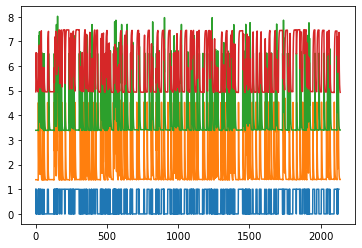

194
6f


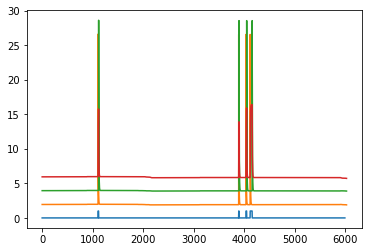

273
6f
B97
6f


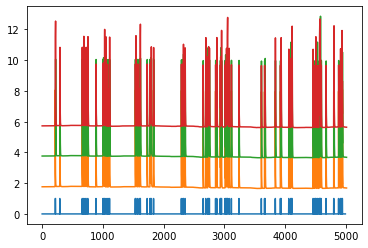

B122
6m


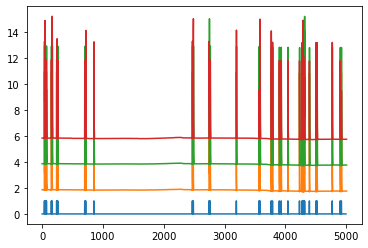

B123
6m


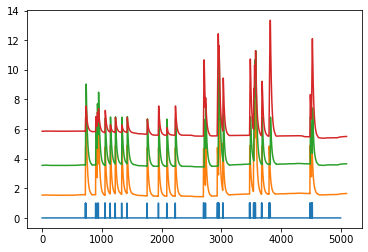

B124
6m


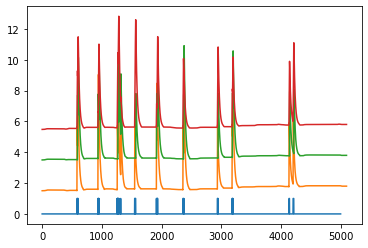

B152
6m


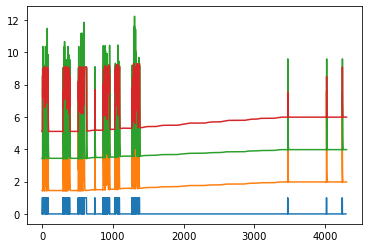

B155
6m


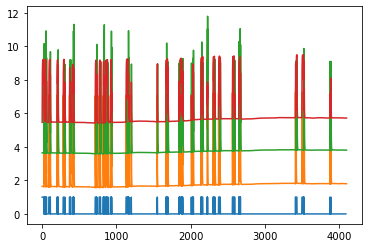

B156
6m
B158
6m


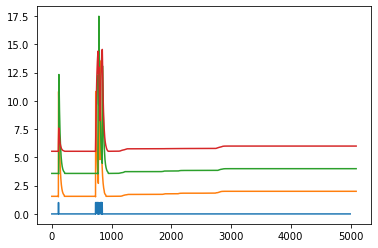

B350
6s
B1065
6s


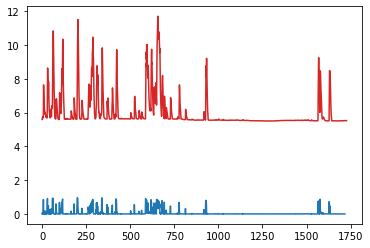

B1066
6s


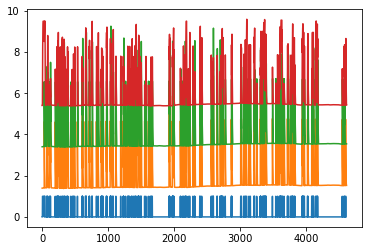

B1276
6s


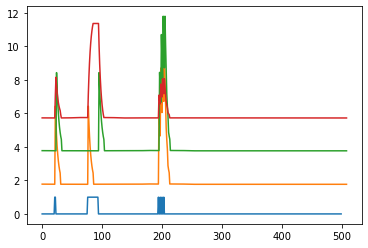

B219
6s


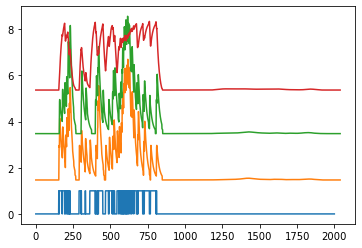

B266
6s


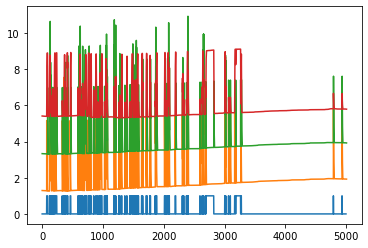

B305
6s


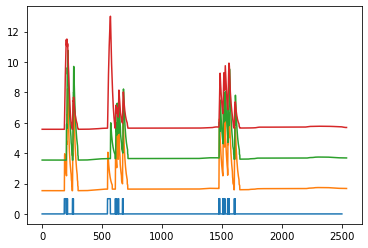

B700
6s


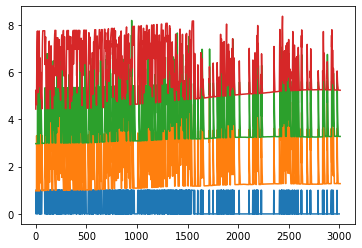

B1252
6s


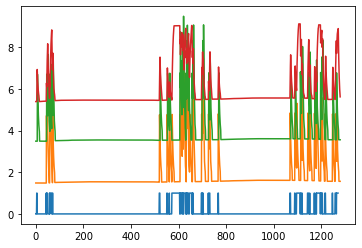

B1253
6s


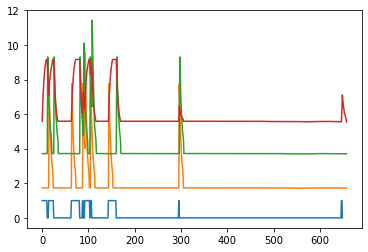

B1269
6s


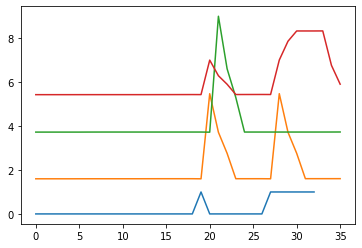

In [9]:
for i in range(GoodICFiles.shape[0]):
#for i in range(GoodICFiles.shape[0]):
#for i in range(7,10):
    try:
    
        if GoodICFiles.iloc[i]['WalkRegressor'] != '':

            TS=loadmat(GoodICFiles.iloc[i]['TSfile'].replace('/','\\').replace('\\media\\NAS','Z:\\GrunwaldKadow_group').replace('.mat','GoodIC.mat'))['TSgoodIC']

            
            try:
                Regressor =loadmat(GoodICFiles.iloc[i]['WalkRegressor'].replace('kd',''))['R']
            except:
                try:
                    Regressor =loadmat(GoodICFiles.iloc[i]['WalkRegressor'].replace('kd',''))['Rwalk']
                except:
                    try:
                        Regressor =loadmat(GoodICFiles.iloc[i]['WalkRegressor'].replace('WalkRbinkd','Rbin'))['R']
                    except:
                        try:
                            Regressor =loadmat(GoodICFiles.iloc[i]['WalkRegressor'].replace('Rbinkd','Rbin'))['Rbin']
                        except:
                            Regressor =loadmat(GoodICFiles.iloc[i]['WalkRegressor'].replace('kd',''))['Rbin']
            
            
            if Regressor.shape[0]<Regressor.shape[1]:
                Regressor=Regressor.T
            
            if TS.shape[0]>TS.shape[1]:
                TS=TS.T            
            if TS.shape[1]==(Regressor.shape[0]-1):
                Regressor=Regressor[1:Regressor.shape[0]]    
            if TS.shape[1]==(Regressor.shape[0]-2):
                Regressor=Regressor[1:Regressor.shape[0]-1]    
            if TS.shape[1]==(Regressor.shape[0]-3):
                Regressor=Regressor[2:Regressor.shape[0]-1] 
            if TS.shape[1]==(Regressor.shape[0]-4):
                Regressor=Regressor[2:Regressor.shape[0]-2]    
            if TS.shape[1]<Regressor.shape[0]:    
                Regressor=Regressor[int(GoodICFiles.iloc[i]['TSlowlimWalk']):int(GoodICFiles.iloc[i]['TShighlimWalk']+1)]     
            if TS.shape[1]==(Regressor.shape[0]-1):
                Regressor=Regressor[1:Regressor.shape[0]]    
                
            
            print(GoodICFiles.iloc[i]['expID'])
            
            UAS=GoodICFiles.iloc[i]['UAS']
            print(UAS)
            if UAS=='6M' or UAS=='6m':
                Kernel=loadmat('C:/Users/Soso/Documents/GitHub/FlyLFM/MatlabFiles/CompareConditions/GCamp6M10ms.mat')['GCaMP6MKernel'][0]
            if UAS=='6f' or UAS=='6F':
                Kernel=loadmat('C:/Users/Soso/Documents/GitHub/FlyLFM/MatlabFiles/CompareConditions/GCamp6F10ms.mat')['GCaMP6Fkernel'][0]
            if UAS=='6s' or UAS=='6S' or UAS=='syt6s':
                Kernel=loadmat('C:/Users/Soso/Documents/GitHub/FlyLFM/MatlabFiles/CompareConditions/GCamp6S10ms.mat')['GCaMP6sKernel'][0]
            if UAS=='7s' or UAS=='7S':
                Kernel=loadmat('C:/Users/Soso/Documents/GitHub/FlyLFM/MatlabFiles/CompareConditions/GCaMP7s10ms.mat')['GCaMP7sKernel'][0]
            if UAS=='7f' or UAS=='7F':
                Kernel=loadmat('C:/Users/Soso/Documents/GitHub/FlyLFM/MatlabFiles/CompareConditions/GCaMP7F10ms.mat')['GCamp7fKernel'][0]                
                
                
            FR=GoodICFiles.iloc[i]['FR']
            Ratio=100/FR
            
            Ker=Kernel[0:200:int(Ratio)]

            
            if pd.isnull(FR)==False:
                plt.plot(Regressor)
                Ron=np.zeros(len(Regressor))
                Roff=np.zeros(len(Regressor))
                
                #fill all gap less than 500ms
                for m in range(0,int(len(Regressor)-0.1*FR)): 
                    R=Regressor[m:(m+ceil(0.1*FR))]
                    if (R[0]==1) and np.sum(R)>1:
                        M=[t for t in range(0,ceil(0.1*FR)) if R[t]==1]
                        Regressor[m:m+M[len(M)-1]]=1
         
                for m in range(int(FR),int(len(Regressor)-FR)):                         
                    if Regressor[m]==1 and Regressor[m-1]==0:
                        Ron[m]=1
                    if Regressor[m]==0 and Regressor[m-1]==1:
                        Roff[m]=1 
                Ronk=np.convolve(Ker, Ron)
                Rons=uniform_filter1d(Ronk, size=4000)
                Rond=Ronk-Rons
                Roffk=np.convolve(Ker, Roff)
                Roffs=uniform_filter1d(Roffk, size=4000)
                Roffd=Roffk-Roffs
                Rbink=np.convolve(Ker, np.squeeze(Regressor))
                Rbins=uniform_filter1d(Rbink, size=4000)
                Rbind=Rbink-Rbins                
                 
            savemat(GoodICFiles.iloc[i]['WalkRegressor'].replace('.mat','Ron_and_Roffkd_and_Rbinfilledkd.mat'),{"Ronkd": Rond, "Roffkd": Roffd, "Rbinkd": Rbind})

 
            plt.plot(Rond/np.std(Rond)+2)
            plt.plot(Roffd/np.std(Roffd)+4)
            plt.plot(Rbind/np.std(Rbind)+6)
            #plt.plot(Regressor)
            
            plt.show()

    except:
         continue   


B40
6m


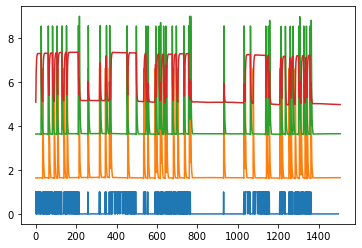

In [14]:
for i in range(19,20):
#for i in range(GoodICFiles.shape[0]):
#for i in range(7,10):
    try:
    
        if GoodICFiles.iloc[i]['WalkRegressor'] != '':

            TS=loadmat(GoodICFiles.iloc[i]['TSfile'].replace('/','\\').replace('\\media\\NAS','Z:\\GrunwaldKadow_group').replace('.mat','GoodIC.mat'))['TSgoodIC']
            TS=TS[:,0:1499]
            Regressor=loadmat(r'C:\Users\Soso\Downloads\B40_1_1499Rbin.mat')['R']
            
            if Regressor.shape[0]<Regressor.shape[1]:
                Regressor=Regressor.T
            
            if TS.shape[0]>TS.shape[1]:
                TS=TS.T            
            if TS.shape[1]==(Regressor.shape[0]-1):
                Regressor=Regressor[1:Regressor.shape[0]]    
            if TS.shape[1]==(Regressor.shape[0]-2):
                Regressor=Regressor[1:Regressor.shape[0]-1]    
            if TS.shape[1]==(Regressor.shape[0]-3):
                Regressor=Regressor[2:Regressor.shape[0]-1] 
            if TS.shape[1]==(Regressor.shape[0]-4):
                Regressor=Regressor[2:Regressor.shape[0]-2]    
            if TS.shape[1]<Regressor.shape[0]:    
                Regressor=Regressor[int(GoodICFiles.iloc[i]['TSlowlimWalk']):int(GoodICFiles.iloc[i]['TShighlimWalk']+1)]     
            if TS.shape[1]==(Regressor.shape[0]-1):
                Regressor=Regressor[1:Regressor.shape[0]]    
                
            
            print(GoodICFiles.iloc[i]['expID'])
            
            UAS=GoodICFiles.iloc[i]['UAS']
            print(UAS)
            if UAS=='6M' or UAS=='6m':
                Kernel=loadmat('C:/Users/Soso/Documents/GitHub/FlyLFM/MatlabFiles/CompareConditions/GCamp6M10ms.mat')['GCaMP6MKernel'][0]
            if UAS=='6f' or UAS=='6F':
                Kernel=loadmat('C:/Users/Soso/Documents/GitHub/FlyLFM/MatlabFiles/CompareConditions/GCamp6F10ms.mat')['GCaMP6Fkernel'][0]
            if UAS=='6s' or UAS=='6S' or UAS=='syt6s':
                Kernel=loadmat('C:/Users/Soso/Documents/GitHub/FlyLFM/MatlabFiles/CompareConditions/GCamp6S10ms.mat')['GCaMP6sKernel'][0]
            if UAS=='7s' or UAS=='7S':
                Kernel=loadmat('C:/Users/Soso/Documents/GitHub/FlyLFM/MatlabFiles/CompareConditions/GCaMP7s10ms.mat')['GCaMP7sKernel'][0]
            if UAS=='7f' or UAS=='7F':
                Kernel=loadmat('C:/Users/Soso/Documents/GitHub/FlyLFM/MatlabFiles/CompareConditions/GCaMP7F10ms.mat')['GCamp7fKernel'][0]                
                
                
            FR=GoodICFiles.iloc[i]['FR']
            Ratio=100/FR
            
            Ker=Kernel[0:200:int(Ratio)]

            
            if pd.isnull(FR)==False:
                plt.plot(Regressor)
                Ron=np.zeros(len(Regressor))
                Roff=np.zeros(len(Regressor))
                
                #fill all gap less than 500ms
                for m in range(0,int(len(Regressor)-1*FR)): 
                    R=Regressor[m:(m+ceil(1*FR))]
                    if (R[0]==1) and np.sum(R)>1:
                        M=[t for t in range(0,ceil(1*FR)) if R[t]==1]
                        Regressor[m:m+M[len(M)-1]]=1
         
                for m in range(int(FR),int(len(Regressor)-FR)):                         
                    if Regressor[m]==1 and Regressor[m-1]==0:
                        Ron[m]=1
                    if Regressor[m]==0 and Regressor[m-1]==1:
                        Roff[m]=1 
                Ronk=np.convolve(Ker, Ron)
                Rons=uniform_filter1d(Ronk, size=4000)
                Rond=Ronk-Rons
                Roffk=np.convolve(Ker, Roff)
                Roffs=uniform_filter1d(Roffk, size=4000)
                Roffd=Roffk-Roffs
                Rbink=np.convolve(Ker, np.squeeze(Regressor))
                Rbins=uniform_filter1d(Rbink, size=4000)
                Rbind=Rbink-Rbins                
                 
            savemat(GoodICFiles.iloc[i]['WalkRegressor'].replace('.mat','Ron_and_Roffkd_and_Rbinfilledkd.mat'),{"Ronkd": Rond, "Roffkd": Roffd, "Rbinkd": Rbind})

 
            plt.plot(Rond/np.std(Rond)+2)
            plt.plot(Roffd/np.std(Roffd)+4)
            plt.plot(Rbind/np.std(Rbind)+6)
            #plt.plot(Regressor)
            
            plt.show()

    except:
         continue   


In [10]:
GoodICFiles.to_pickle("GoodICsdf.pkl")
GoodICFiles.to_pickle("Z:\GrunwaldKadow_group\Sophie\WalkProject\GoodICsdf.pkl")